In [25]:
import os
import numpy as np
from os import path
import pandas as pd
import re
from selenium import webdriver

In [35]:
csv = pd.read_csv("stimuli/pruned_seeds2.csv")
boxes = pd.read_csv("bounding_boxes/word_coordinates_final/liesBetween_boxes.csv")
raw_code = csv['function'][48]

In [21]:
def get_all_line_col(input_str, word):
    lines = input_str.split('\n')
    occurrences = []
    for i, line in enumerate(lines, start=1):
        start = 0
        while True:
            start = line.find(word, start)
            if start == -1:
                break
            column = start + 1
            occurrences.append((i, column))
            start += len(word)
    return occurrences

In [34]:
word = 'return'
occurrences = get_all_line_col(raw_code, word)
if occurrences:
    for i, (line, col) in enumerate(occurrences, start=1):
        print(
            f'Occurrence {i} of the word "{word}" was found at line {line}, column {col}.')
else:
    print(f'The word "{word}" was not found in the input string.')


hello 
hello 
hello private boolean liesBetween( double x1, double x2, double x3 ) {
hello     if (( x1 <= x2 ) 
hello     	&& ( x3 >= x1 - ACCURACY && x3 <= x2 + ACCURACY ))
hello     		return true;
hello     if (( x1 >= x2 ) 
hello     	&& ( x3 >= x2 - ACCURACY && x3 <= x1 + ACCURACY ))
hello     		return true;
hello     	
hello     return false;
hello } 
hello 
Occurrence 1 of the word "return" was found at line 6, column 7.
Occurrence 2 of the word "return" was found at line 9, column 7.
Occurrence 3 of the word "return" was found at line 11, column 5.


In [1]:
for i in range(1):
    print(i)

0


In [3]:
directory = '/home/zachkaras/codeSummary_eyetracking/codesummary_eyetracking/task/eyetracking_visualization/cap_string_test/'
#directory = './eyetracking_visualization/test/'
os.chdir(directory)

FileNotFoundError: [Errno 2] No such file or directory: '/home/zachkaras/codeSummary_eyetracking/codesummary_eyetracking/task/eyetracking_visualization/cap_string_test/'

In [6]:
driver = webdriver.Chrome
driver.get('https://www.python.org')


TypeError: get() missing 1 required positional argument: 'url'

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [40]:
#img = cv2.imread("./bounding_boxes/add_copy.png")
#img = cv2.imread("./eyetracking_visualization/reading_task.png")
img = cv2.imread("./bounding_boxes/final_stimuli/capitalizeString.png")
img = cv2.imread("./bounding_boxes/temp/markStart/clock.createNewtimer() ;.png")
img = cv2.imread("./bounding_boxes/temp/markStart/GarbagecollectiontimerListener.png")
print(img.shape)

(120, 1690, 3)


382


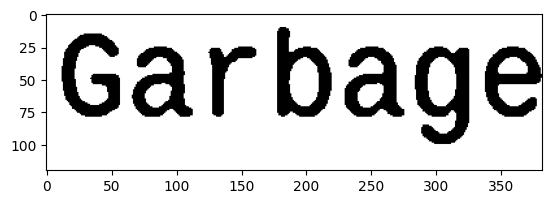

In [42]:
letter_width = 1690/31
garbage = round(7*letter_width)
print(garbage)
clock_img = img[:, 0:garbage]
plt.imshow(clock_img)

In [5]:
print(img[0]*2)
resized = cv2.resize(img, (img[0]*2, img[1]*2), interpolation=cv2.INTER_LINEAR)

[[254 254 254]
 [254 254 254]
 [254 254 254]
 ...
 [254 254 254]
 [254 254 254]
 [254 254 254]]


error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type


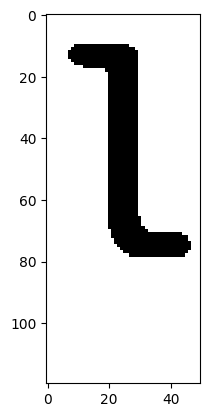

In [31]:
#plt.imshow(img)
cropped_img = img
test = cropped_img[:, 118:]
plt.imshow(test)

In [47]:
# crop_test = img[:, 1150:1920] # these settings look good for visualization purposes of reading stimuli
# plt.imshow(crop_test)
#cropped_image = img[100:1000, 10:1150]  # these measurements look good

################
### READING TASK
################
# prewritten summary: img[200:325, 1175:1875]
# accurate img[450:550, 1175:1775]
# missing important info img[550:700, 1175:1775]
# unncecessary img[725:825, 1175:1775]
# easily readable English img[825:950, 1175:1775]

################
### WRITING TASK
################
# Writing summary img[85:385, 1165:1885]
cropped_img = img
test = cropped_image[11:(11+15), 494:(494+24)]


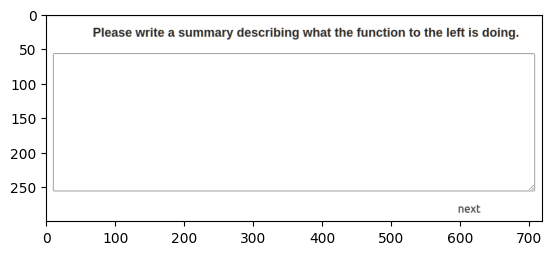

In [48]:
plt.imshow(cropped_image)

In [3]:
import cv2
import pandas as pd
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

#pytesseract.pytesseract.tesseract_cmd = '/home/zachkaras/.local/bin/pytesseract'

# Add code here for reading in input
img = cv2.imread('./bounding_boxes/final_stimuli/add.png')
img = img[100:1000, 10:1150]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
dilation = cv2.dilate(thresh, rect_kernel, iterations=1)
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

img2 = img.copy()
#plt.imshow(gray)
# exit(1)
# #img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# #plt.imshow(img)
# # # Convert to gray    
# # #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # Apply dilation and erosion to remove some noise    
# # kernel = np.ones((1, 1), np.uint8)    
# # img = cv2.dilate(img, kernel, iterations=1)    
# # img = cv2.erode(img, kernel, iterations=1)
# c = 0
for box in contours:

    x, y, w, h = cv2.boundingRect(box)  # coordinates, width, and height
    tangle = cv2.rectangle(img2, (x, y), (x+w, y+h),
                           (0, 255, 0, 2))  # drawing the rectangle

    word_img = gray[y:y+h, x:x+w]  # getting the word from the image
    test_y = word_img.shape[0]
    test_x = word_img.shape[1]
    #plt.imshow(word_img)
    test = cv2.resize(word_img, (test_x * 5, test_y * 5))
    
    cv2.imwrite("./resizeTest.png", test)
    

    #word = "word{c}".format(c=c)  # FIXME - temp before I can get pytesseract
    #word = pytesseract.image_to_string(word_img)
    #print(type(word))
    #test.append(word)
    exit(1)

    #new_entry = {word: [[x, y], [x+w, y], [x, y+h], [x+w, y+h]]}
    #pd.concat([coordinates, new_entry])


In [ ]:
# Doing some preprocessing on the screenshot https://www.geeksforgeeks.org/text-detection-and-extraction-using-opencv-and-ocr/
ret, thresh = cv2.threshold(
    gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
dilation = cv2.dilate(thresh, rect_kernel, iterations=1)
contours, hierarchy = cv2.findContours(
    dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
plt.imshow(img)

#img2 = img.copy()
img2 = cv2.resize(img, (0, 0), fx=2, fy=2)
#pytesseract.image_to_string(img2, thresh)
# putting all coordinates for each function's bounding boxes into their own CSVs
coordinates = pd.DataFrame()
c = 1
test = []
# adding coordinates for each word into two separate lists
for box in contours:

    x, y, w, h = cv2.boundingRect(box)  # coordinates, width, and height
    tangle = cv2.rectangle(img2, (x, y), (x+w, y+h),
                           (0, 255, 0, 2))  # drawing the rectangle

    word_img = img2[y:y+h, x:x+w]  # getting the word from the image

    word = "word{c}".format(c=c)  # FIXME - temp before I can get pytesseract
    word = pytesseract.image_to_string(word_img)
    #print(type(word))
    test.append(word)
    c += 1

    #new_entry = {word: [[x, y], [x+w, y], [x, y+h], [x+w, y+h]]}
    #pd.concat([coordinates, new_entry])

#coordinates.to_csv('./word_coordinates/{file}.csv'.format(file=filename[:-4]))
print(test)
print(len(test))
